<llm-snippet-file>notebooks/experiments/shapefiles.ipynb</llm-snippet-file>


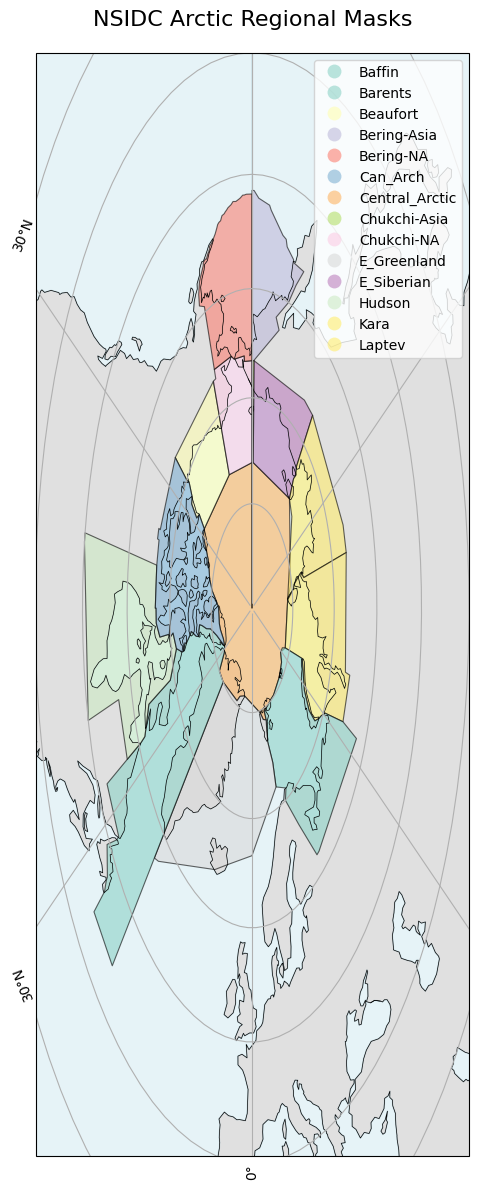

Available regions:
['Central_Arctic' 'Beaufort' 'Chukchi-NA' 'Chukchi-Asia' 'E_Siberian'
 'Laptev' 'Kara' 'Barents' 'E_Greenland' 'Baffin' 'Hudson' 'Can_Arch'
 'Bering-NA' 'Bering-Asia']


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
import numpy as np

# Load the NSIDC Arctic regional masks shapefile
# Replace 'path_to_shapefile.shp' with your actual file path
gdf = gpd.read_file('../../data/raw/shapefiles_regions/NSIDC-0780_SeaIceRegions_NH_v1.0.shp')

gdf = gdf[gdf['Region'].isin(['Central_Arctic', 'Beaufort', 'Chukchi-NA', 'Chukchi-Asia', 'E_Siberian', 'Laptev', 'Kara', 'Barents', 'E_Greenland', 'Baffin', 'Hudson', 'Can_Arch', 'Bering-NA', 'Bering-Asia'])]

# Create figure with Arctic polar stereographic projection
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Set map extent to focus on Arctic
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())

# Add geographic features
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)

# Create a colormap for different regions
unique_regions = gdf['Region'].nunique()  # Adjust column name as needed
colors = plt.cm.Set3(np.linspace(0, 1, unique_regions))
cmap = ListedColormap(colors)

# Plot the regional masks with different colors
gdf.plot(ax=ax, transform=ccrs.PlateCarree(),
         column='Region',  # Adjust column name as needed
         cmap=cmap,
         alpha=0.6,
         edgecolor='black',
         linewidth=0.8,
         legend=True)

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

plt.title('NSIDC Arctic Regional Masks', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print region names for reference
print("Available regions:")
print(gdf['Region'].unique())  # Adjust column name as needed
